In [ ]:
!pip install monai scikit-learn nibabel



In [ ]:
!pip install -U monai


Time taken: 20.96 seconds


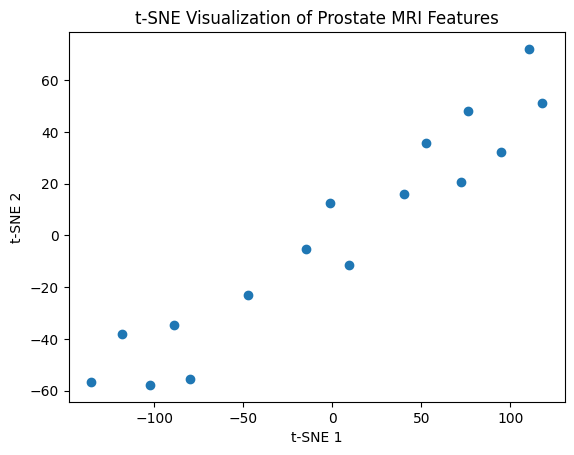

In [10]:
import nibabel as nib
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from google.cloud import storage
import time  

client = storage.Client()

test_image_paths = [
    'Med Decathlon Prostate/151/artifactFiles/imagesTs/prostate_03.nii.gz',
    'Med Decathlon Prostate/151/artifactFiles/imagesTs/prostate_05.nii.gz',
    'Med Decathlon Prostate/151/artifactFiles/imagesTs/prostate_08.nii.gz',
    'Med Decathlon Prostate/151/artifactFiles/imagesTs/prostate_09.nii.gz',
    'Med Decathlon Prostate/151/artifactFiles/imagesTs/prostate_11.nii.gz',
    'Med Decathlon Prostate/151/artifactFiles/imagesTs/prostate_12.nii.gz',
    'Med Decathlon Prostate/151/artifactFiles/imagesTs/prostate_15.nii.gz',
    'Med Decathlon Prostate/151/artifactFiles/imagesTs/prostate_19.nii.gz',
    'Med Decathlon Prostate/151/artifactFiles/imagesTs/prostate_22.nii.gz',
    'Med Decathlon Prostate/151/artifactFiles/imagesTs/prostate_23.nii.gz',
    'Med Decathlon Prostate/151/artifactFiles/imagesTs/prostate_26.nii.gz',
    'Med Decathlon Prostate/151/artifactFiles/imagesTs/prostate_27.nii.gz',
    'Med Decathlon Prostate/151/artifactFiles/imagesTs/prostate_30.nii.gz',
    'Med Decathlon Prostate/151/artifactFiles/imagesTs/prostate_33.nii.gz',
    'Med Decathlon Prostate/151/artifactFiles/imagesTs/prostate_36.nii.gz',
    'Med Decathlon Prostate/151/artifactFiles/imagesTs/prostate_45.nii.gz'
]

def download_blob(bucket_name, source_blob_name, destination_file_name):
    """Downloads a blob from the bucket."""
    bucket = client.bucket(bucket_name)
    blob = bucket.blob(source_blob_name)
    blob.download_to_filename(destination_file_name)

def load_nii_image(image_path):
    local_file = image_path.split('/')[-1]  
    download_blob('marketplace-p115jwl6', image_path, local_file)
    
    nii_image = nib.load(local_file)
    return nii_image.get_fdata()

start_time = time.time()

test_images = [load_nii_image(path) for path in test_image_paths]

def extract_features(image_data):
    mean_intensity = np.mean(image_data)
    std_intensity = np.std(image_data)
    return [mean_intensity, std_intensity]

features = [extract_features(image) for image in test_images]

features_array = np.array(features)

n_samples = len(features_array)

perplexity_value = min(5, n_samples - 1)  
tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity_value)
tsne_result = tsne.fit_transform(features_array)

end_time = time.time()

print(f"Time taken: {end_time - start_time:.2f} seconds")

plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
plt.title('t-SNE Visualization of Prostate MRI Features')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()
